<a href="https://colab.research.google.com/github/Raghava11020/ML/blob/main/Ganji_Raghava_Programming_Assignment_01_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

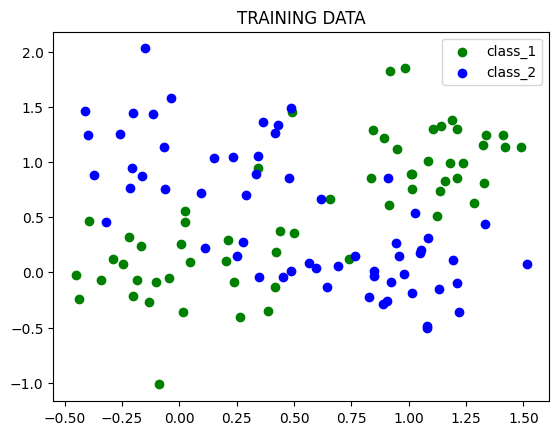

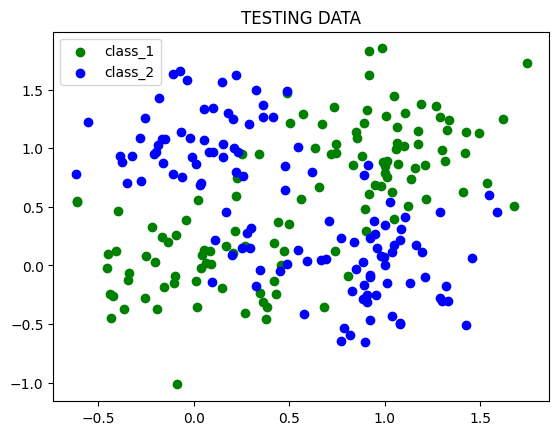

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1=[0,0]
mean2=[1,1]
mean3=[1,0]
mean4=[0,1]
cov=[[0.1,0], [0,0.1]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
sample_1=np.random.multivariate_normal(mean1, cov,90)
sample_2=np.random.multivariate_normal(mean2, cov,90)
sample_3=np.random.multivariate_normal(mean3, cov,90)
sample_4=np.random.multivariate_normal(mean4, cov,90)

class_1=np.concatenate((sample_1,sample_2))
class_2=np.concatenate((sample_3,sample_4))



#Generate training data

Xtr_1=class_1[np.random.choice(class_1.shape[0],60, replace=False)]
Xtr_2=class_2[np.random.choice(class_2.shape[0],60, replace=False)]

#X_train=np.concatenate((class_1[:60],class_2[:60]))
#X_train=np.concatenate((class_1[120:],class_2[120:]))
X_train=np.concatenate((Xtr_1,Xtr_2))
Y_train=np.concatenate([np.ones(60),-np.ones(60)])


#Generate testing data

Xt_1=class_1[np.setdiff1d(np.arange(class_1.shape[0]),np.random.choice(class_1.shape[0],60, replace=False))]
Xt_2=class_2[np.setdiff1d(np.arange(class_2.shape[0]),np.random.choice(class_2.shape[0],60, replace=False))]

#X_test=np.concatenate((class_1[60:],class_2[60:]))
#X_test=np.concatenate((class_1[:120],class_2[:120]))
X_test=np.concatenate((Xt_1,Xt_2))
Y_test=np.concatenate([np.ones(120),-np.ones(120)])



#Visualize the data using plt.scatter() function
xtr_1, ytr_1=X_train[Y_train==1].T
xtr_2, ytr_2=X_train[Y_train==-1].T

plt.scatter(xtr_1,ytr_1,c='green',label='class_1')
plt.scatter(xtr_2,ytr_2,c='blue',label='class_2')
plt.title('TRAINING DATA')
plt.legend()
plt.show()

xt_1, yt_1=X_test[Y_test==1].T
xt_2, yt_2=X_test[Y_test==-1].T

plt.scatter(xt_1, yt_1,c='green',label='class_1')
plt.scatter(xt_2, yt_2,c='blue',label='class_2')
plt.title('TESTING DATA')
plt.legend()
plt.show()


85.41666666666666


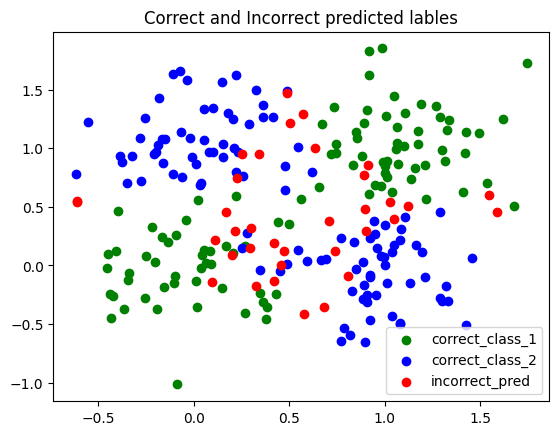

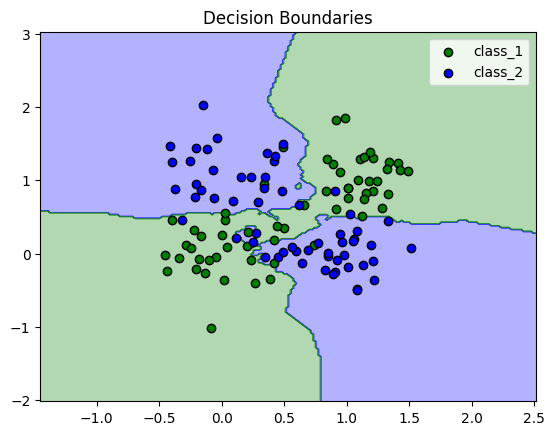

In [ ]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train=X_train
        self.Y_train=Y_train

    def predict(self,X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        Y_pred=[]
        for test_point in X_test:
          if self.distance_metric == 'l2':
            distances = np.sqrt(np.sum((self.X_train - test_point) ** 2, axis=1))
          elif self.distance_metric == 'l1':
            distances = np.sum(np.abs(self.X_train - test_point), axis=1)

          nearest_neighbors=np.argsort(distances)[:self.n_neighbors]
          nearest_labels=self.Y_train[nearest_neighbors]
          Y_pred.append(np.sign(np.sum(nearest_labels)))
        return np.array(Y_pred)


#Write "KNNAccuracy" function
    def KNNAccuracy(self,true,pred):
        #Inputs : Ground truth and predicted labels
        #Outputs : Portion of data points that are correctly classified, i.e., accuracy
      return np.mean(true==pred)

knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print(knn.KNNAccuracy(Y_test,Y_pred)*100)



#Create a visual representation of predictions
correct_pred=(Y_test == Y_pred)
incorrect_pred=np.logical_not(correct_pred)


x_1, y_1=X_test[(Y_test==1)&correct_pred].T
x_2, y_2=X_test[(Y_test==-1)&correct_pred].T
x_3,y_3=X_test[incorrect_pred].T


plt.scatter(x_1,y_1, c='green', label='correct_class_1')
plt.scatter(x_2,y_2, c='blue', label='correct_class_2')
plt.scatter(x_3,y_3, c='red', label='incorrect_pred')
plt.legend()
plt.title('Correct and Incorrect predicted lables')
plt.show()



#Generate and visualize the decision regions and overlay the test points
def plot_decision_boundaries(classifier, X_train, Y_train):
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_predictions = classifier.predict(grid_points)
    grid_predictions = grid_predictions.reshape(xx.shape)

    light=ListedColormap([ '#AAAAFF','#AAFFAA'])  # Light green, Light blue (Background)
    dark = ListedColormap(['#0000FF','#008000']) # Dark Green, Dark Blue (Background)

    plt.contourf(xx, yy, grid_predictions, alpha=0.3, cmap=dark)
    plt.scatter(xtr_1,ytr_1,c='green',label='class_1',edgecolors='k')
    plt.scatter(xtr_2,ytr_2,c='blue',label='class_2', edgecolors='k')
    plt.legend()
    plt.title('Decision Boundaries')
    plt.show()

plot_decision_boundaries(knn,X_train,Y_train)



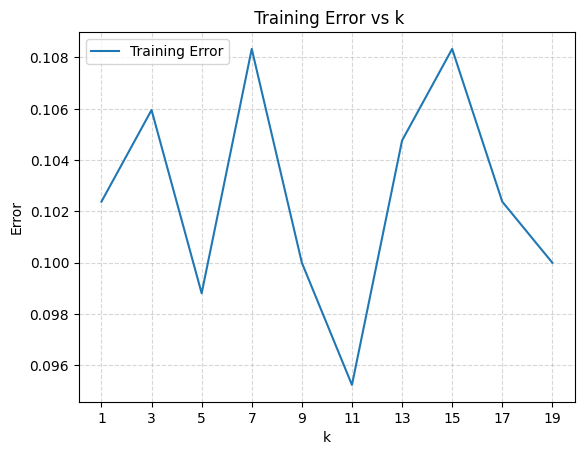

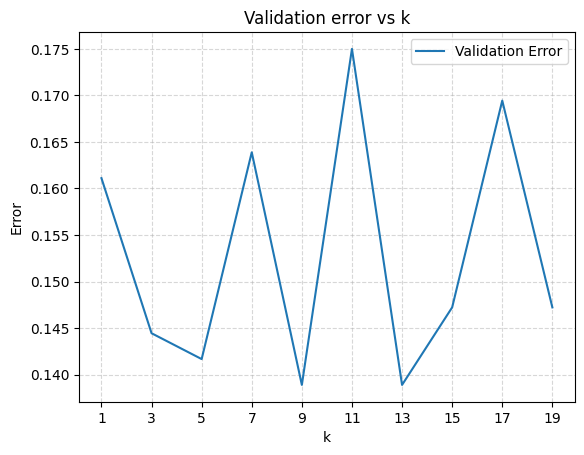

85.0


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,rho):
  #Iterate through range of k values
    #Hold out rho fraction of training data in each repetition.
  num_repetitions=10
  train_errors={k:[]for k in k_range}
  val_errors={k:[] for k in k_range}

  for k in k_range:
    for _ in range(num_repetitions):
      num_val_samples=int(rho*len(X_train))
      val_indices=random.sample(range(len(X_train)),num_val_samples)
      train_indices=[i for i in range(len(X_train)) if i not in val_indices]

      X_train_fold=X_train[train_indices]
      Y_train_fold=Y_train[train_indices]
      X_val_fold=X_train[val_indices]
      Y_val_fold=Y_train[val_indices]

      knn=KNeighborsClassifier()
      knn.fit(X_train_fold,Y_train_fold)
      Y_train_pred=knn.predict(X_train_fold)
      Y_val_pred=knn.predict(X_val_fold)
      train_errors[k].append(1-knn.KNNAccuracy(Y_train_fold,Y_train_pred))
      val_errors[k].append(1-knn.KNNAccuracy(Y_val_fold,Y_val_pred))



  #Return errors on training and validation data
  return train_errors, val_errors


k_range=range(1,21,2)
rho=0.3
train_errors, val_errors=holdoutCVkNN(k_range,rho)

avg_train_error=[np.mean(errors)for errors in train_errors.values()]
avg_val_error=[np.mean(errors)for errors in val_errors.values()]



#Plot training and validation errors for different values of k
plt.plot(k_range,avg_train_error,label='Training Error')
plt.xticks(k_range)
plt.grid(True,linestyle='--',alpha=0.5)
plt.xlabel('k')
plt.ylabel('Error')
plt.title(" Training Error vs k")
plt.legend()
plt.show()

plt.plot(k_range,avg_val_error,label='Validation Error')
plt.xticks(k_range)
plt.grid(True,linestyle='--',alpha=0.5)
plt.xlabel('k')
plt.ylabel('Error')
plt.title("Validation error vs k")
plt.legend()
plt.show()



#what is the best value for k?
# I got best value of k as 15, because for k=15 I am getting less val error around 0.085.
# the k is also best k is also changing according to different iterations because we are generating the random indices for validation set.


#Effect of rho on k
# If we decreasing the rho towards 0, the model will not have any valiation set so, val_error is decreasing and the training error is becoming almost constant.
# If we increase the rho towards 1 both errors are increasing. We can say that for rho =0.3 my training error and val error are varying with k and they are not much high values also.


#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
k_best=k_range[np.argmin(avg_val_error)]
knn_best=KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(X_train,Y_train)
Y_pred_bestk=knn_best.predict(X_test)
print(knn_best.KNNAccuracy(Y_test,Y_pred_bestk)*100)

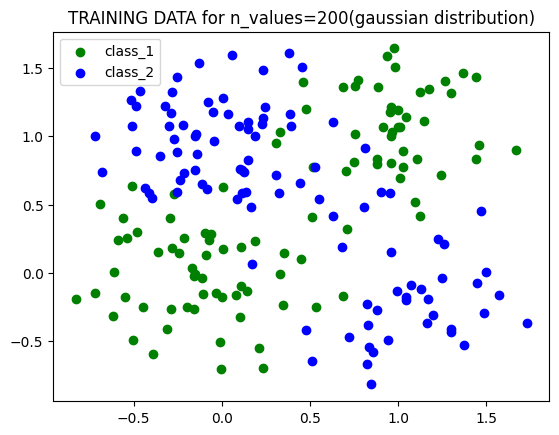

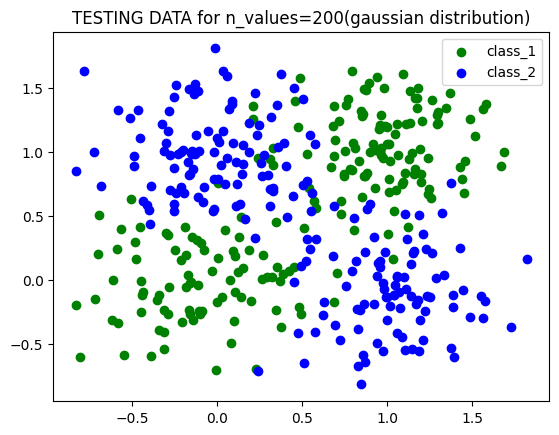

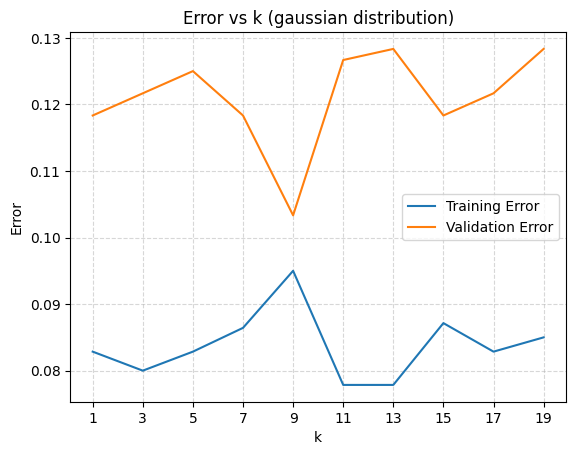

90.0


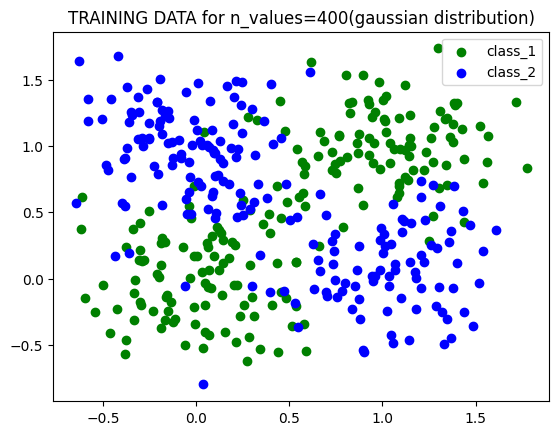

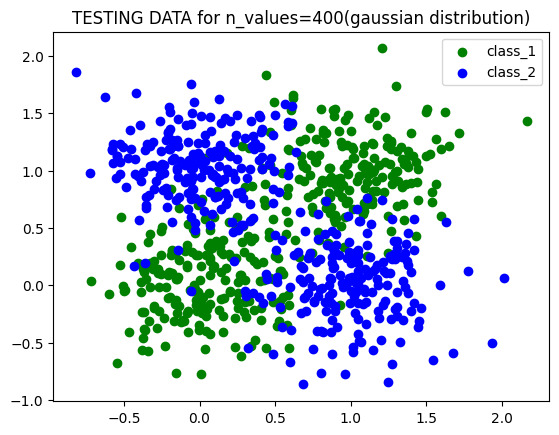

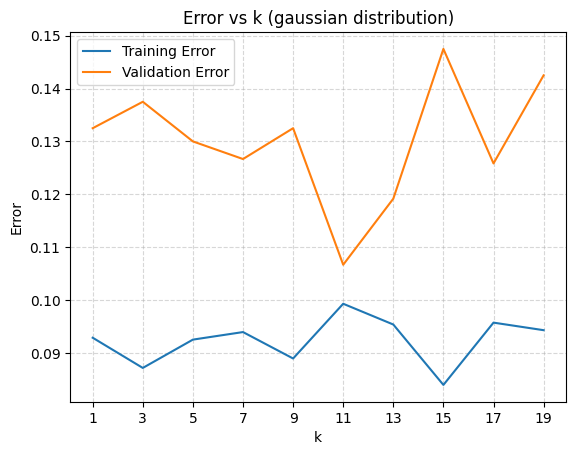

87.375


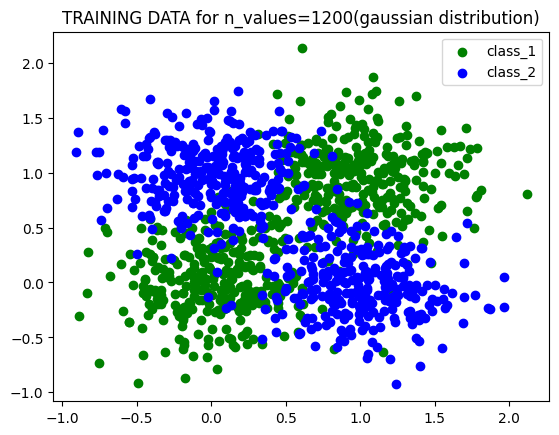

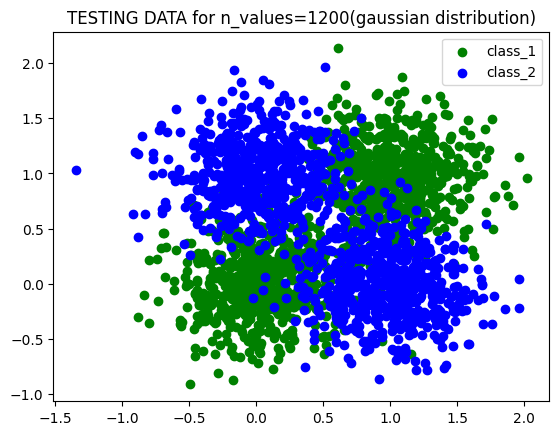

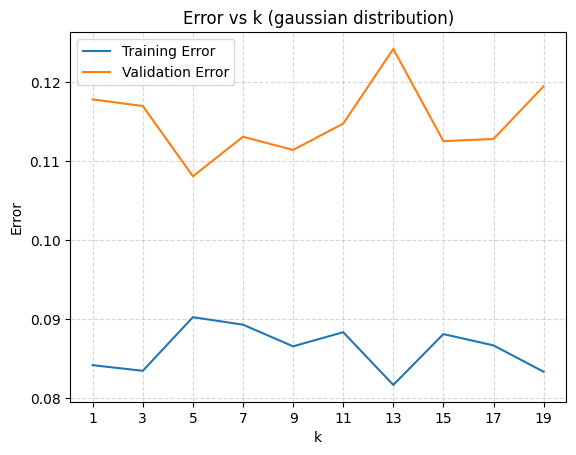

88.95833333333333


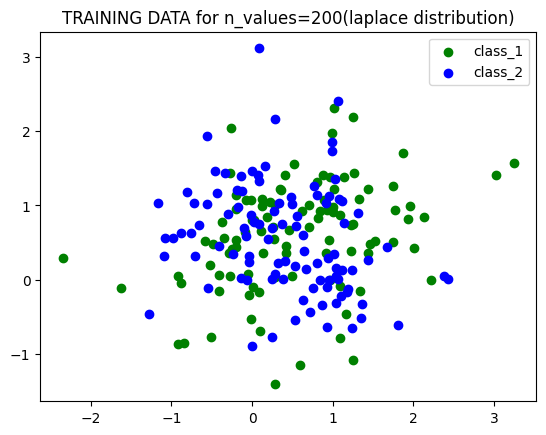

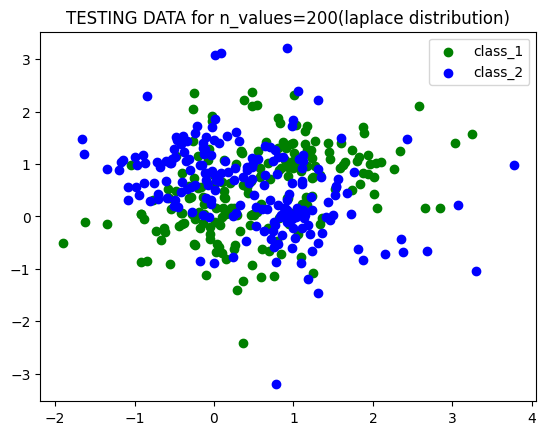

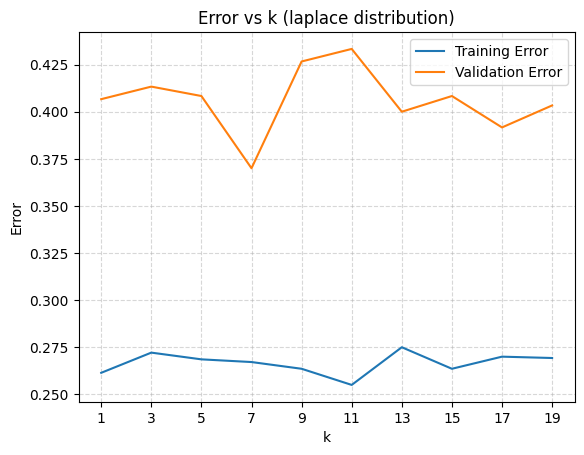

67.0


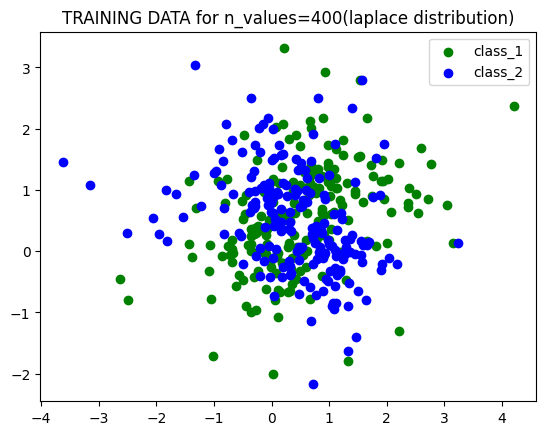

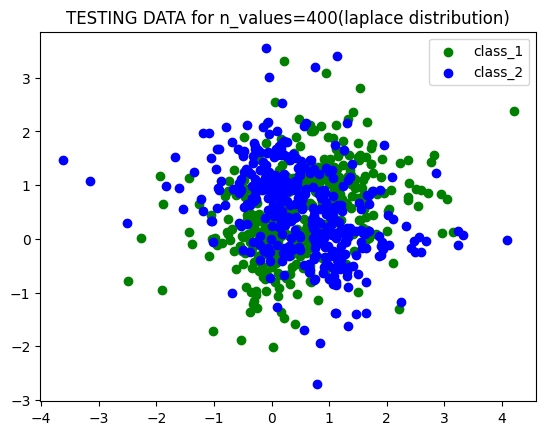

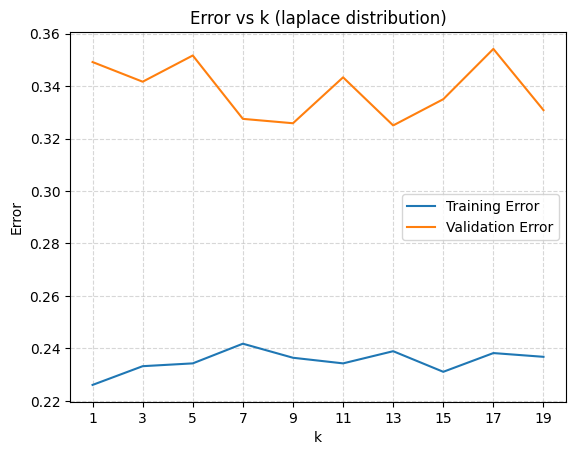

71.5


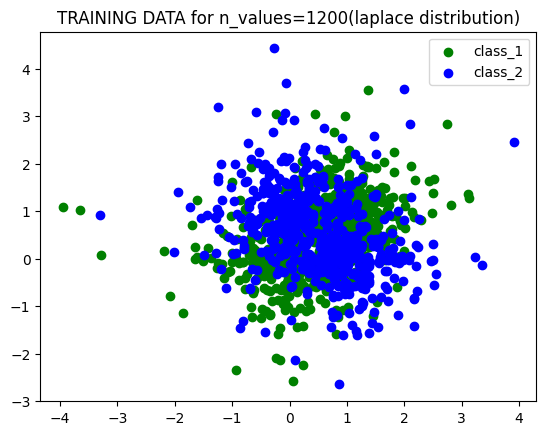

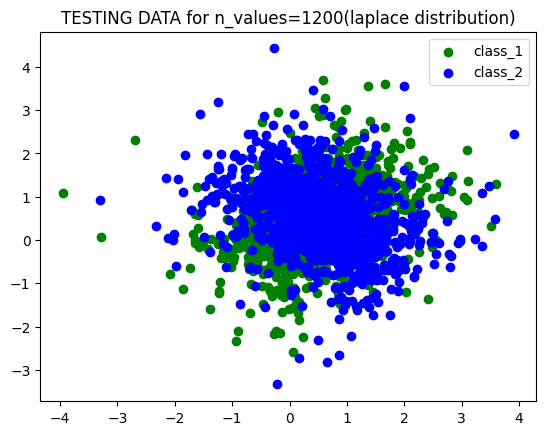

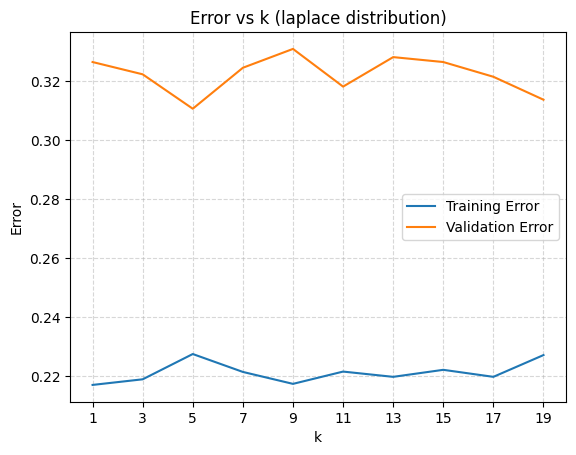

69.875


In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
n_values=[200,400,1200]


mean1=[0,0]
mean2=[1,1]
mean3=[1,0]
mean4=[0,1]
cov=[[0.1,0], [0,0.1]]

for n in n_values:
  #Sample data points from the bivariate Gaussian distribution
  #You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
  sample_1=np.random.multivariate_normal(mean1, cov,int((n*3)/4))
  sample_2=np.random.multivariate_normal(mean2, cov,int((n*3)/4))
  sample_3=np.random.multivariate_normal(mean3, cov,int((n*3)/4))
  sample_4=np.random.multivariate_normal(mean4, cov,int((n*3)/4))

  class_1=np.concatenate((sample_1,sample_2))
  class_2=np.concatenate((sample_3,sample_4))



  #Generate training data

  Xtr_1=class_1[np.random.choice(class_1.shape[0],int(n/2), replace=False)]
  Xtr_2=class_2[np.random.choice(class_2.shape[0],int(n/2), replace=False)]


  X_train=np.concatenate((Xtr_1,Xtr_2))
  Y_train=np.concatenate([np.ones(int(n/2)),-np.ones(int(n/2))])


  #Generate testing data

  Xt_1=class_1[np.setdiff1d(np.arange(class_1.shape[0]),np.random.choice(class_1.shape[0],int(n/2), replace=False))]
  Xt_2=class_2[np.setdiff1d(np.arange(class_2.shape[0]),np.random.choice(class_2.shape[0],int(n/2), replace=False))]


  X_test=np.concatenate((Xt_1,Xt_2))
  Y_test=np.concatenate([np.ones(int(n)),-np.ones(int(n))])



  #Visualize the data using plt.scatter() function
  xtr_1, ytr_1=X_train[Y_train==1].T
  xtr_2, ytr_2=X_train[Y_train==-1].T

  plt.scatter(xtr_1,ytr_1,c='green',label='class_1')
  plt.scatter(xtr_2,ytr_2,c='blue',label='class_2')
  plt.title(f'TRAINING DATA for n_values={n}(gaussian distribution)')
  plt.legend()
  plt.show()

  xt_1, yt_1=X_test[Y_test==1].T
  xt_2, yt_2=X_test[Y_test==-1].T

  plt.scatter(xt_1, yt_1,c='green',label='class_1')
  plt.scatter(xt_2, yt_2,c='blue',label='class_2')
  plt.title(f'TESTING DATA for n_values={n}(gaussian distribution)')
  plt.legend()
  plt.show()

  k_range=range(1,21,2)
  rho=0.3
  train_errors, val_errors=holdoutCVkNN(k_range,rho)

  avg_train_error=[np.mean(errors)for errors in train_errors.values()]
  avg_val_error=[np.mean(errors)for errors in val_errors.values()]



  #Plot training and validation errors for different values of k
  plt.plot(k_range,avg_train_error,label='Training Error')
  plt.plot(k_range,avg_val_error,label='Validation Error')
  plt.xticks(k_range)
  plt.grid(True,linestyle='--',alpha=0.5)
  plt.xlabel('k')
  plt.ylabel('Error')
  plt.title("Error vs k (gaussian distribution)")
  plt.legend()
  plt.show()


  k_best=k_range[np.argmin(avg_val_error)]
  knn_best=KNeighborsClassifier(n_neighbors=k_best)
  knn_best.fit(X_train,Y_train)
  Y_pred_bestk=knn_best.predict(X_test)
  print(knn_best.KNNAccuracy(Y_test,Y_pred_bestk)*100)




#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian
scale=0.5
def laplace_bivariate(mean,scale,size):
  return np.column_stack((np.random.laplace(mean[0],scale,size),np.random.laplace(mean[1],scale,size)))

for n in n_values:
  #Sample data points from the bivariate Gaussian distribution
  #You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution


  sample_1=laplace_bivariate(mean1, scale,int((n*3)/4))
  sample_2=laplace_bivariate(mean2, scale,int((n*3)/4))
  sample_3=laplace_bivariate(mean3, scale,int((n*3)/4))
  sample_4=laplace_bivariate(mean4, scale,int((n*3)/4))


  class_1=np.concatenate((sample_1,sample_2))
  class_2=np.concatenate((sample_3,sample_4))



  #Generate training data

  Xtr_1=class_1[np.random.choice(class_1.shape[0],int(n/2), replace=False)]
  Xtr_2=class_2[np.random.choice(class_2.shape[0],int(n/2), replace=False)]


  X_train=np.concatenate((Xtr_1,Xtr_2))
  Y_train=np.concatenate([np.ones(int(n/2)),-np.ones(int(n/2))])


  #Generate testing data

  Xt_1=class_1[np.setdiff1d(np.arange(class_1.shape[0]),np.random.choice(class_1.shape[0],int(n/2), replace=False))]
  Xt_2=class_2[np.setdiff1d(np.arange(class_2.shape[0]),np.random.choice(class_2.shape[0],int(n/2), replace=False))]


  X_test=np.concatenate((Xt_1,Xt_2))
  Y_test=np.concatenate([np.ones(int(n)),-np.ones(int(n))])



  #Visualize the data using plt.scatter() function
  xtr_1, ytr_1=X_train[Y_train==1].T
  xtr_2, ytr_2=X_train[Y_train==-1].T

  plt.scatter(xtr_1,ytr_1,c='green',label='class_1')
  plt.scatter(xtr_2,ytr_2,c='blue',label='class_2')
  plt.title(f'TRAINING DATA for n_values={n}(laplace distribution)')
  plt.legend()
  plt.show()

  xt_1, yt_1=X_test[Y_test==1].T
  xt_2, yt_2=X_test[Y_test==-1].T

  plt.scatter(xt_1, yt_1,c='green',label='class_1')
  plt.scatter(xt_2, yt_2,c='blue',label='class_2')
  plt.title(f'TESTING DATA for n_values={n}(laplace distribution)')
  plt.legend()
  plt.show()

  k_range=range(1,21,2)
  rho=0.3
  train_errors, val_errors=holdoutCVkNN(k_range,rho)

  avg_train_error=[np.mean(errors)for errors in train_errors.values()]
  avg_val_error=[np.mean(errors)for errors in val_errors.values()]



  #Plot training and validation errors for different values of k
  plt.plot(k_range,avg_train_error,label='Training Error')
  plt.plot(k_range,avg_val_error,label='Validation Error')
  plt.xticks(k_range)
  plt.grid(True,linestyle='--',alpha=0.5)
  plt.xlabel('k')
  plt.ylabel('Error')
  plt.title("Error vs k (laplace distribution)")
  plt.legend()
  plt.show()


  k_best=k_range[np.argmin(avg_val_error)]
  knn_best=KNeighborsClassifier(n_neighbors=k_best)
  knn_best.fit(X_train,Y_train)
  Y_pred_bestk=knn_best.predict(X_test)
  print(knn_best.KNNAccuracy(Y_test,Y_pred_bestk)*100)



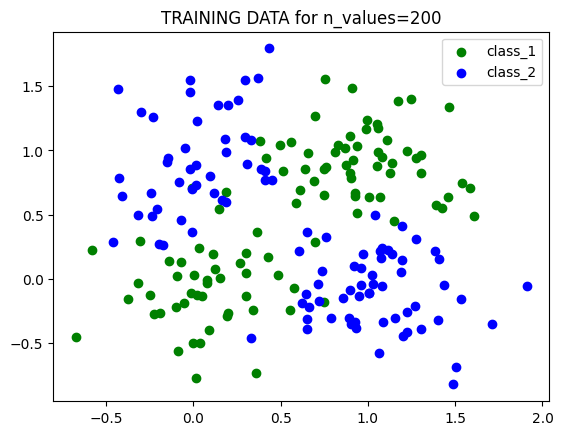

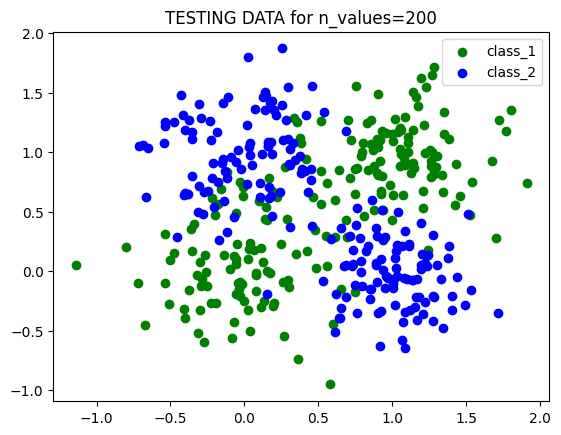

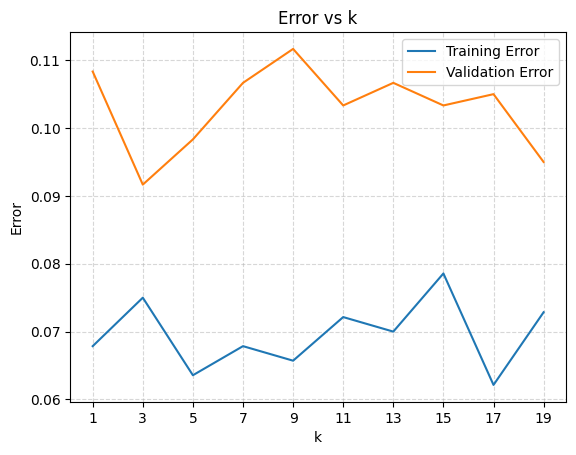

l2
86.75


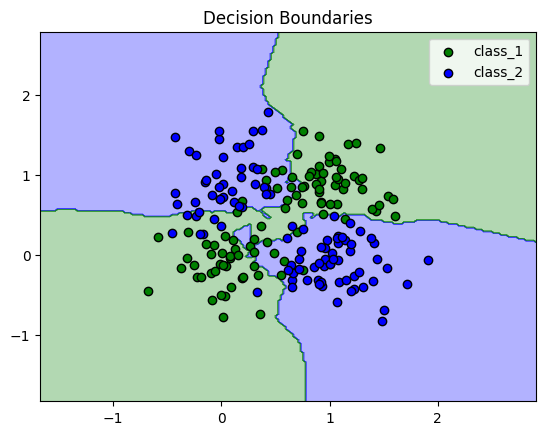

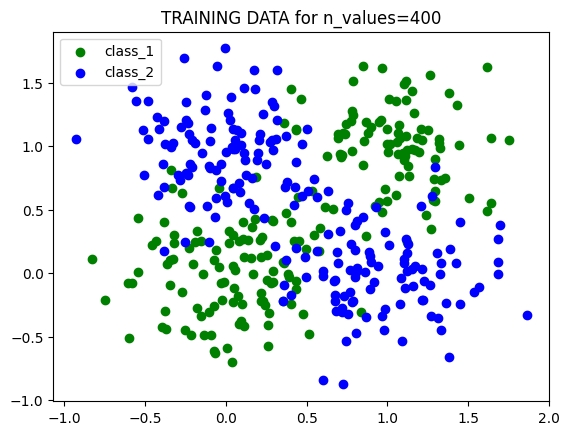

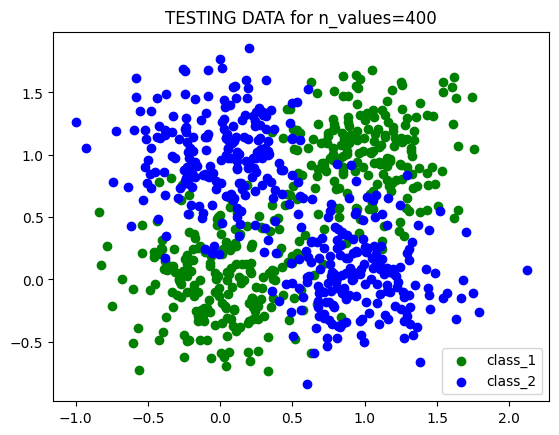

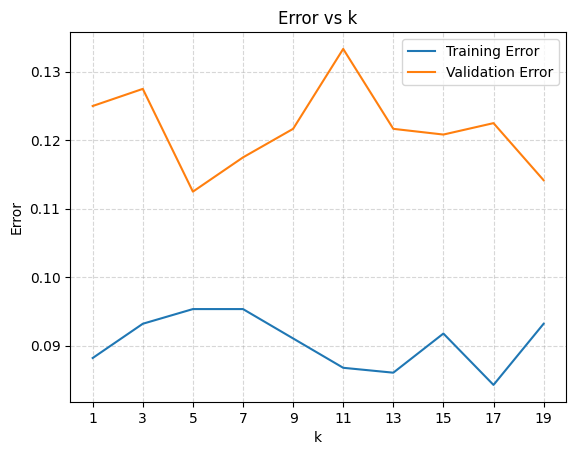

l2
88.125


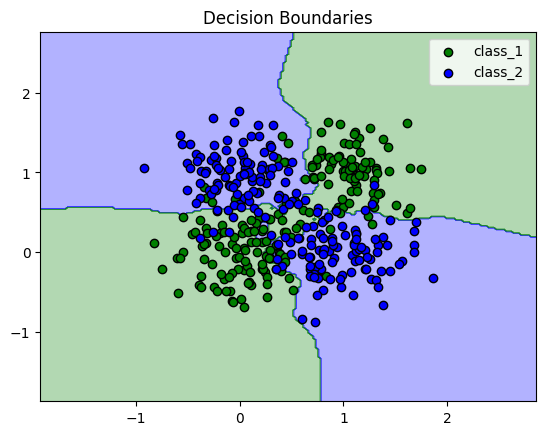

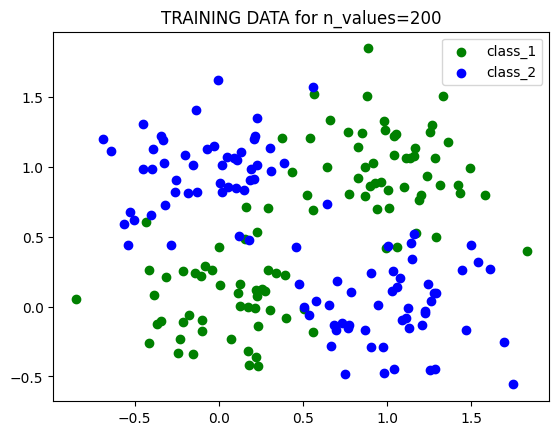

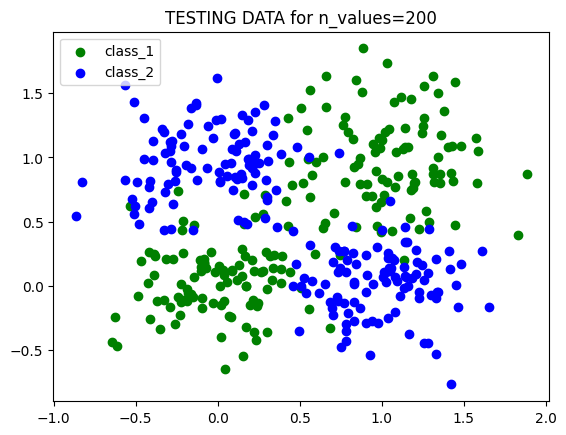

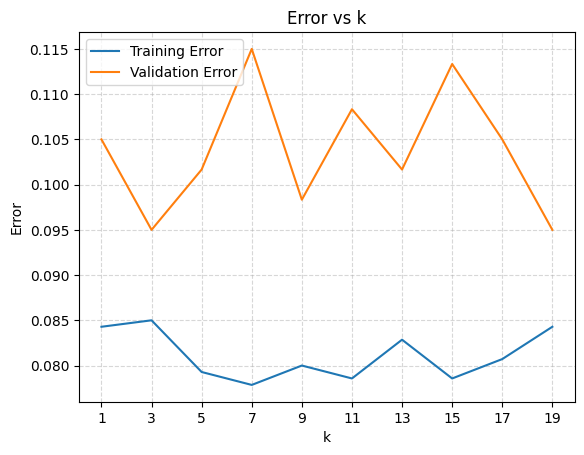

l1
90.25


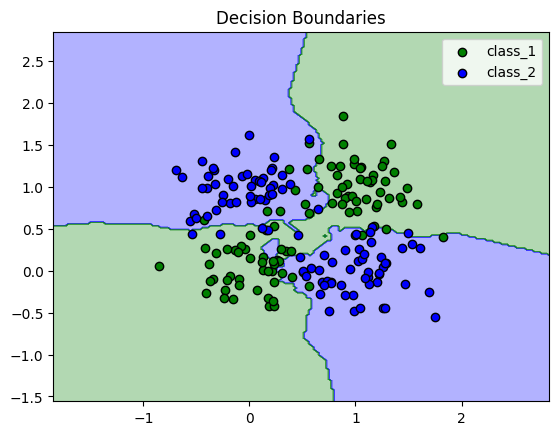

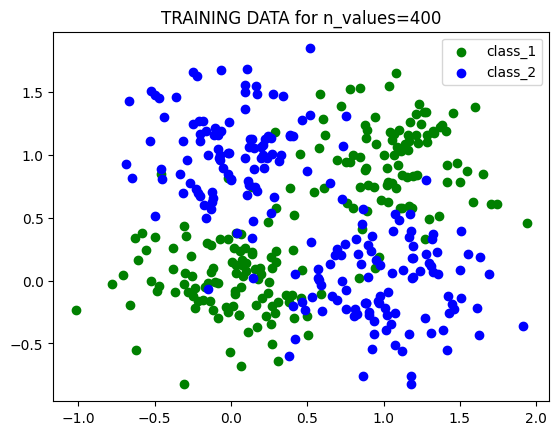

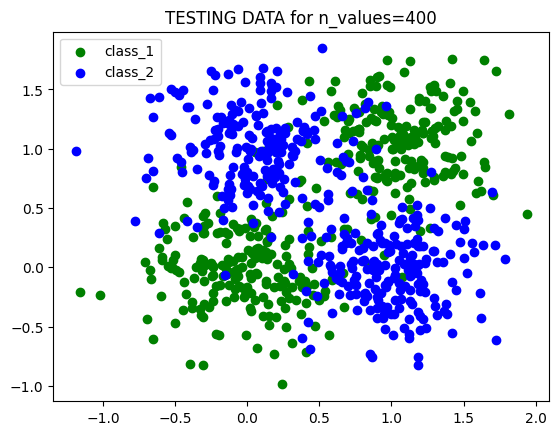

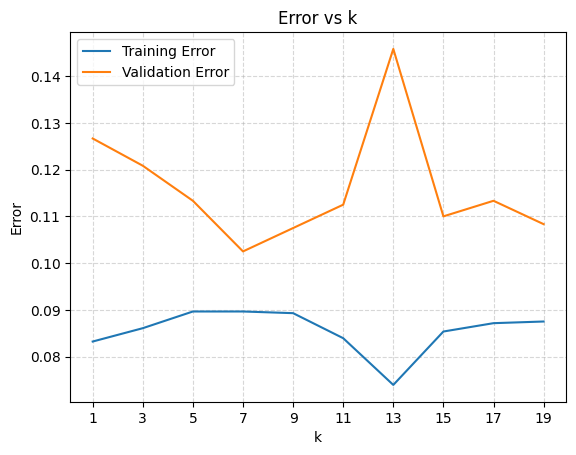

l1
89.125


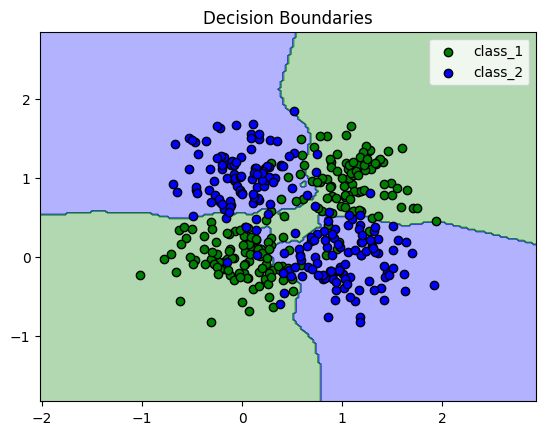

In [ ]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric
distance_metrics=['l2','l1']

for dist_metric in distance_metrics:
  # removed 1200 because taking more time for generation(data points are more).
  n_values=[200,400]


  mean1=[0,0]
  mean2=[1,1]
  mean3=[1,0]
  mean4=[0,1]
  cov=[[0.1,0], [0,0.1]]

  for n in n_values:
    #Sample data points from the bivariate laplace distribution

    sample_1=np.random.multivariate_normal(mean1, cov,int((n*3)/4))
    sample_2=np.random.multivariate_normal(mean2, cov,int((n*3)/4))
    sample_3=np.random.multivariate_normal(mean3, cov,int((n*3)/4))
    sample_4=np.random.multivariate_normal(mean4, cov,int((n*3)/4))

    class_1=np.concatenate((sample_1,sample_2))
    class_2=np.concatenate((sample_3,sample_4))



    #Generate training data

    Xtr_1=class_1[np.random.choice(class_1.shape[0],int(n/2), replace=False)]
    Xtr_2=class_2[np.random.choice(class_2.shape[0],int(n/2), replace=False)]


    X_train=np.concatenate((Xtr_1,Xtr_2))
    Y_train=np.concatenate([np.ones(int(n/2)),-np.ones(int(n/2))])


    #Generate testing data

    Xt_1=class_1[np.setdiff1d(np.arange(class_1.shape[0]),np.random.choice(class_1.shape[0],int(n/2), replace=False))]
    Xt_2=class_2[np.setdiff1d(np.arange(class_2.shape[0]),np.random.choice(class_2.shape[0],int(n/2), replace=False))]


    X_test=np.concatenate((Xt_1,Xt_2))
    Y_test=np.concatenate([np.ones(int(n)),-np.ones(int(n))])



    #Visualize the data using plt.scatter() function
    xtr_1, ytr_1=X_train[Y_train==1].T
    xtr_2, ytr_2=X_train[Y_train==-1].T

    plt.scatter(xtr_1,ytr_1,c='green',label='class_1')
    plt.scatter(xtr_2,ytr_2,c='blue',label='class_2')
    plt.title(f'TRAINING DATA for n_values={n}')
    plt.legend()
    plt.show()

    xt_1, yt_1=X_test[Y_test==1].T
    xt_2, yt_2=X_test[Y_test==-1].T

    plt.scatter(xt_1, yt_1,c='green',label='class_1')
    plt.scatter(xt_2, yt_2,c='blue',label='class_2')
    plt.title(f'TESTING DATA for n_values={n}')
    plt.legend()
    plt.show()

    k_range=range(1,21,2)
    rho=0.3
    train_errors, val_errors=holdoutCVkNN(k_range,rho)

    avg_train_error=[np.mean(errors)for errors in train_errors.values()]
    avg_val_error=[np.mean(errors)for errors in val_errors.values()]



    #Plot training and validation errors for different values of k
    plt.plot(k_range,avg_train_error,label='Training Error')
    plt.plot(k_range,avg_val_error,label='Validation Error')
    plt.xticks(k_range)
    plt.grid(True,linestyle='--',alpha=0.5)
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.title("Error vs k")
    plt.legend()
    plt.show()

    print(dist_metric)
    #Understand the decision regions of KNN classifier with different distance metric

    k_best=k_range[np.argmin(avg_val_error)]
    knn_best=KNeighborsClassifier(n_neighbors=k_best)
    knn_best.fit(X_train,Y_train)
    Y_pred_bestk=knn_best.predict(X_test)
    print(knn_best.KNNAccuracy(Y_test,Y_pred_bestk)*100)

    plot_decision_boundaries(knn,X_train,Y_train)









In [ ]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
from sklearn.model_selection import train_test_split
X_train_val,X_test,Y_train_val,Y_test=train_test_split(images,targets,test_size=0.1, random_state=42)
X_val,X_train,Y_val,Y_train=train_test_split(X_t,Y_t,test_size=0.11, random_state=42)



#Write 'MultiClassKNNClassify' function
class MultiClassKNNClassify:
   def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self,X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train=X_train
        self.Y_train=Y_train

    def predict(self,X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        Y_pred=[]
        for test_point in X_test:
          if self.distance_metric == 'l2':
            distances = np.sqrt(np.sum((self.X_train - test_point) ** 2, axis=1))
          elif self.distance_metric == 'l1':
            distances = np.sum(np.abs(self.X_train - test_point), axis=1)

          nearest_neighbors=np.argsort(distances)[:self.n_neighbors]
          nearest_labels=self.Y_train[nearest_neighbors]
          Y_pred.append(np.sign(np.sum(nearest_labels)))
        return np.array(Y_pred)




#Empirically chose most suitable k and distance metric based on the evauation on cross-validation data
k_range=range(1,21,2)



#Evaluate the performance on test data with the best hyper parameters ( k, distance metric ) obtained from cross validation




#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels



#Suggest an alternative ways to improve performance





SyntaxError: incomplete input (<ipython-input-27-c242ac281b6a>, line 50)

<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data


1ans:The best accuracy is 91.125% for n=400 training size.